In [1]:
# Import common python libraries
import numpy as np
import pandas as pd

# For optimization
from scipy import optimize as opt

# import helper function from utils
from utils import save_fig
from utils import plot_dataset
from utils import plot_decision_boundary 
from utils import sigmoid
from utils import hypothesis
from utils import cost_function

# Matplotlib for plotting figures
import matplotlib as mpl
import matplotlib.pyplot as plt

# ignoring Numpy errors
np.seterr(all = 'ignore') 

%matplotlib inline

In [2]:
# load the preprocessed iris dataset
dataset = pd.read_csv('datasets/iris_process.data',
                      delimiter=',',
                      header=None, 
                      names=['sepal length', 'sepal width', 'petal length', 'petal width','class'])

print('\nNumber of records:',len(dataset))
print('\nclass domain:', dataset['class'].unique())
print('\n\n',dataset.head())


Number of records: 150

class domain: [0 1]


    sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [3]:
X = pd.DataFrame(dataset,columns=['sepal length','sepal width']).values
y = dataset['class'].values
print('The shape of X:',X.shape)
print('The shape of y:',y.shape)

The shape of X: (150, 2)
The shape of y: (150,)


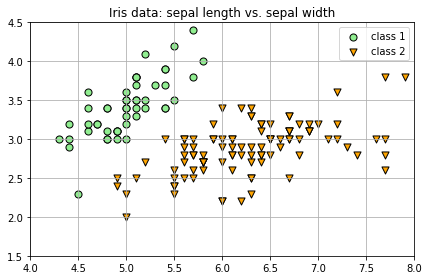

In [4]:
plt.figure(1)
plt.title('Iris data: sepal length vs. sepal width')
plot_dataset(X,y)
plt.grid(True)
plt.axis([4.0,8.0,1.5,4.5])
plt.legend()
plt.show()

In [5]:
# INITIALIZATIONS
(m,n) = X.shape
num_iters = 400
theta = np.zeros((n+1, 1)); # initialize fitting parameters to zeros
Xnew = np.c_[np.ones((m, 1)), X]; # Add a column of ones to x for x0 = 1

In [6]:
cost = cost_function(theta, Xnew, y) # Calling the logistic cost function
print('\nInitial Cost: %f' % (cost) + ', Theta: ' + str(theta[:,0]))


Initial Cost: 0.693147, Theta: [0. 0. 0.]


In [7]:
def fit(func, theta,x,y,iters):
    result = opt.fmin(func=func, x0=theta, args=(x,y),maxiter=iters, full_output=1)
    return result[0], result[1]

In [8]:
theta,cost = fit(cost_function,theta,Xnew,y, num_iters)
print('\nResults (found by fmin):\nMinimum point: '\
      + str(theta) + ', Cost: %.5f' % (cost));

Optimization terminated successfully.
         Current function value: 0.006696
         Iterations: 277
         Function evaluations: 489

Results (found by fmin):
Minimum point: [-30.42215834  13.00720606 -12.69097221], Cost: 0.00670


In [9]:
def predict(X,theta):
    probability = sigmoid(hypothesis(X,theta))
    if probability>=0.5:
        return "class 2"
    elif probability < 0.5:
        return "class 1"

In [10]:
Xtest = [1, 6.75,4.25]
Ytest = predict(Xtest,theta)
print("\nPrediction:",Ytest)


Prediction: class 2


<Figure size 432x288 with 0 Axes>

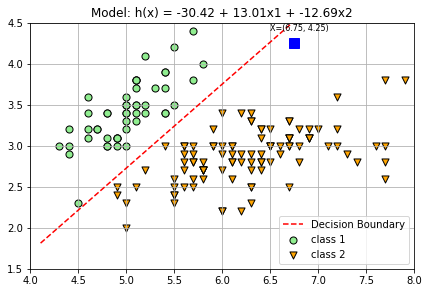

In [11]:
plt.figure(3)
plot_decision_boundary(X,y, theta)
plt.plot(6.75,4.25,'s', color='blue', markersize=10)
plt.annotate("X=(6.75, 4.25)",
             xy=(6.78, 4.25),
             xytext=(6.8, 4.4),
             ha="center",
             fontsize=8,
            )
plt.axis([4.0,8.0,1.5,4.5])
plt.show()